# CSCI4022 Homework 6; More Graphs and some Recommendations

## Due Friday, April 9 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (15 pts; Coding: PageRank)



Consider the sparsely encoded link matrix in `EVA_Links`.  Each row is an (i, j) link tuple, where the row is included if company i is an owner of company j.  Each to/from integer ID corresponds to an index in the accompanying file `EVA_nodename`.  There is no node name or company indexed `0`, so you'll want to account for that.  There is no header, and the encoding is UTF-8.

#### a) 

Run the PageRank algorithm on this graph to determine the most powerful corporate "owners," so we'll interpret edges as pointing *to* the owning party.  Report the final PageRanks as an ordered ranking of the pages, printing the top 10 **companies**.  Include a teleportation probability of 15%.

In [188]:
#read in data
links = pd.read_csv("EVA_Links.csv", encoding = 'UTF-8', skip_blank_lines = False, header = None)
nodeNames = pd.read_csv("EVA_nodename.csv", encoding = 'UTF-8', skip_blank_lines = False, header = None)
nodes = nodeNames[0].values.tolist()
#create a graph
G = nx.Graph
#add edges from links
G = nx.from_pandas_edgelist(links, 0, 1)
#perform pagerank
rank = nx.pagerank(G)
#turn rank dict to a list so we can sort off highest pagerank
ranklist = list(rank.items())
ranklist.sort(key=lambda item: item[1], reverse = True)
#print top 10 companies
companylist = []
for i in range(10):
    company = ranklist[i][0]
    companylist.append(ranklist[i][0])
    print('#', i+1, '= ', nodes[company],':',ranklist[i][1])
    
#print data for the edges of the top 10 companies
for i in range(10):
    connections = []
    print('')
    print('nodes connected to ', nodes[companylist[i]],':')
    edge = list(G.edges(companylist[i]))
    for i in range(len(edge)):
        connections.append(nodes[edge[i][1]])
    print(connections)

# 1 =  Cox Communications : 0.034625459963400794
# 2 =  The McGraw-Hill Companies : 0.018179875331873818
# 3 =  Comcast : 0.013206950884453138
# 4 =  New York Times : 0.01059726974932397
# 5 =  WAOK-AM (Atlanta) : 0.009268426832577262
# 6 =  MediaNews Group : 0.009253170831822984
# 7 =  General Electric (GE) : 0.00844518788212058
# 8 =  Dow-Jones & : 0.008001222411590946
# 9 =  Bresnan International Partners (Chile) : 0.007823223216690831
# 10 =  Tribune : 0.006592050804438889

nodes connected to  Cox Communications :
['WERC-AM (Birmingham, Alabama)', 'WMJJ-FM (Birmingham, Alabama)', 'WDXB-FM (Birmingham, Alabama)', 'WQEN-FM (Birmingham, Alabama)', 'WAAX-AM (Gadsden, Alabama)', 'WGMZ-FM (Gadsden, Alabama)', 'WBHP-AM (Huntsville, Alabama)', 'WDRM-FM (Huntsville, Alabama)', 'WHOS-AM (Huntsville, Alabama)', 'WTAK-FM (Huntsville, Alabama)', 'WWXQ-FM (Huntsville, Alabama)', 'WXQW-FM (Huntsville, Alabama)', 'WDWG-FM (Mobile, Alabama)', 'WKSJ-AM (Mobile, Alabama)', 'WMXC-FM (Mobile, Alabama)'

#### b) 

The top 10 pages should include some companies you've heard of, but may also include many you *haven't*.  For those top 10 PageRanks, scan through the edges linking either *to* or *from* those pages and comment on any patterns that seem important.

Do these top few results pass a sanity check, in the context of what those companies do?  

Do they pass a sanity check that may suppor the claim that "PageRank returns the most important ownership structures?"  Why or why not?

The top 10 companies all have to do with news, communication, or education. These subjects are popular in the world as many people need to hear the news, communicate, and seek education. This would make sense that these companies have the most important ownership structures. They are also all large companies that connect to other companies that fall into the same subject classification of radio, communication, news, and education. Looking at the edge connections, many connected companies support the top company by using information sourced from them or the top company compiles information from all the other companies for a one stop location.

-------------------------------------------------------------------------------
Source on data set:

 UF Sparse Matrix Collection, Tim Davis
 
 http://www.cise.ufl.edu/research/sparse/matrices/Pajek/EVA
 
 name: Pajek/EVA

 date: 2002
 
 author: K. Norlen, G. Lucas, M. Gebbie, J. Chuang
 
ed: V. Batagelj

-------------------------------------------------------------------------------



***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Graph Cuts; 20 pts) 
Suppose our graph is given below:

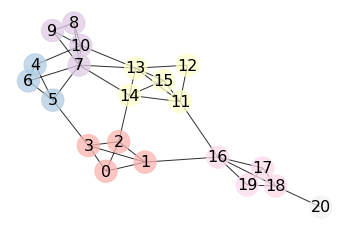

In [192]:
#manual edge assignments
edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],[17,18],\
      [1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]]
#create a dictionary as option
nodes = list(range(21))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)

#networkx to plot the graph
G=nx.Graph()
nodes=[i for i in range(21)]
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


Loosely speaking, the data is generated from 5 clusters, although 2 clusters overlap somewhat.

### Part 1:
Find the Fiedler vector for the graph.  Plot the sorted Fiedler vector.  Use the `edges` array defined above.


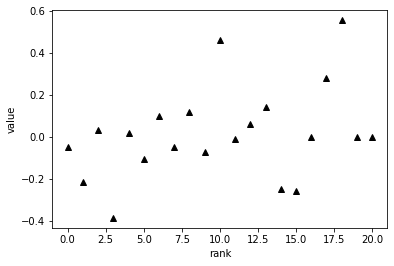

In [344]:
#create a nxn matrix of zeros for each matrix A, D, L
A = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
D = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
L = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
K = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
#loop through the edges
#for each edge, put in one in the Aij spot to show a connection
for k in range(len(edges)):
    i = edges[k][0]
    j = edges[k][1]
    A[i][j] = 1
    A[j][i] = 1
    if k <= 20:
        A[k][k] = 1
#loop through A
#sum each row and insert at D[i][i] to create the degree matrix
for k in range(21):
    D[k][k] = sum(A[k])
#loop through each location in A/D matrix
#subtract each row of A from D to create the laplacian matrix
for k in range(21):
    for j in range(21):
        L[k][j] = D[k][j] - A[k][j]
#compute eigenvectors and eigenvalues (used numpy manual for linalg.eig syntax)
w,v = np.linalg.eig(L)
#sort the eigenvalues to find the second smallest
sortw = np.sort(w)
eigen = sortw[1]
#find the eigenvector corresponding to this value
for i in range(len(w)):
    if eigen == w[i]:
        evec = v[i]
#create the fiedler vector
fiedler = []
for i in range(len(evec)):
    x2 = i
    fiedler.append((eigen,evec[x2]))
#sort values left and right of zero to find grouping
right = []
left = []
for i in range(len(fiedler)):
    if fiedler[i][1]>0:
        right.append(i)
    else:
        left.append(i)
#plot fiedler
x = []
y = []
for i in range(len(fiedler)):
    x.append(i)
    y.append(fiedler[i][1])
plt.plot(x, y,'^k')
plt.plot(0,0)
plt.ylabel('value')
plt.xlabel('rank')
plt.show()


### Part 2: Partitions

#### Part 2a:

Partition the graph into 2 graphs using this vector.  Include a picture of the associated *cut* of the graph.


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


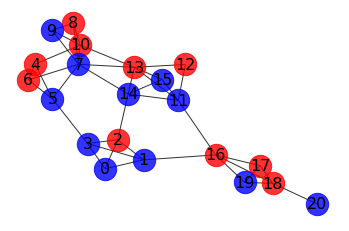

In [345]:
#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
#nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
#used the networkx manual source given on piazza to change color of nodes
options = {"node_size": 500, "alpha": 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=right, node_color="r", **options) #nodes in right should be red
nx.draw_networkx_nodes(G, pos, nodelist=left, node_color="b", **options) #nodes in left should be blue
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


#### Part 2b:

Partition the graph into 3 subgraphs using the Fiedler vector.  One natural way to do so is to partitition at the two largest 1-D **jumps** in the sorted vector instead of just one cut at $y=0$.  Include both associated *cuts* in another picture of the graph.

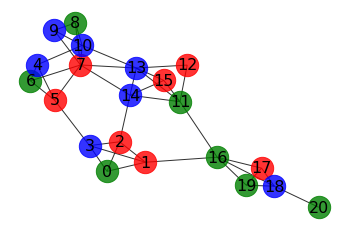

In [379]:
#create variables to keep track of sections
right1 = []
middle1 = []
left1 = []
#create a variable for original order of values
orig = v[x2]
#sort values
sortfied = np.sort(v[x2])
#distribute values based off the sorted array into 3 sections
for i in range(21):
    if i < 7:
        right1.append(sortfied[i])
    elif i >= 7 and i < 14:
        middle1.append(sortfied[i])
    else:
        left1.append(sortfied[i])
#create new node lists for coloring
rcolor = []
mcolor = []
lcolor = []
for i in range(3):
    for j in range(7):
        if i == 0:
            index = np.where(orig == right1[j])[0][0]
            rcolor.append(index)
        elif i == 1:
            index = np.where(orig == middle1[j])[0][0]
            mcolor.append(index)
        else:
            index = np.where(orig == left1[j])[0][0]
            lcolor.append(index)
#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
#nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
#used the networkx manual source given on piazza to change color of nodes
options = {"node_size": 500, "alpha": 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=rcolor, node_color="r", **options) #nodes in right should be red
nx.draw_networkx_nodes(G, pos, nodelist=mcolor, node_color="g", **options) #nodes in middle should be green
nx.draw_networkx_nodes(G, pos, nodelist=lcolor, node_color="b", **options) #nodes in left should be blue
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");



### Part 2c:

Partition the graph into 4 subgraphs using bipartitioning.


[1 2 3 3 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5 6 7]
[7, 13, 10, 11, 14, 16, 1, 2, 3, 5, 18, 0, 4, 6, 8, 9, 15, 17, 19, 12, 20, 0]


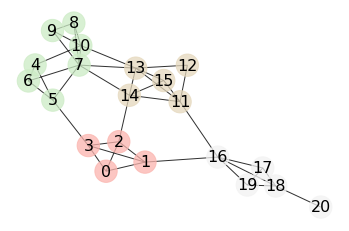

In [432]:
s1 = []
s2 = []
s3 = []
s4 = []
#keep track of the order of nodes with greatest amount of neighbors
order = []
numNeigh = []
for i in range(21):
    count = neighbors[i]
    numNeigh.append(len(count))
#find the order of nodes based on greatest amount of neighbors
run = True
while(run):
    top = (0,0)
    for i in range(21):
        if numNeigh[i] > top[1]:
            top = (i,numNeigh[i])
    numNeigh[top[0]] = -1
    order.append(top[0])
    if top[1] == 0:
        run = False
print(sortorder)
print(order)

#with looking at nodes with the highest amount of neighbors the clusters can be made along these groups
#using the displayed graph and cutting the edges that extend from formed clusters:
#7, 13, 10, 11, 14, 16, 1, 2, 3, 5 creates 4 clusters that are about even

for i in range(len(order)):
    s1.append(order[i])
#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
#use colors to part
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,1,1,1,1,3,3,3,3,3,4,4,4,4,4] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


### Part 2d:

Of the 3 partitions above, which do you think were most appropriate.  Why?


I had trouble on part 2c but think the resulting graph looks the best partitioned. For each cluster the amount of cut edges is minimized while trying to keep subgraphs of equal volume. If I ignore 2c since I had some trouble finising the partition, I think the partition in 2a is the best. I was able to use the different matrix representation for the graph to determine the best partition for subgraphs.

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (10 pts; Theory: Network MLEs)

Suppose graphs are generated by picking a probability $p$ and choosing each edge independently with probability $p$, as if our entire network were coming from a Community Affiliation Graph Model (AGM) with only *one*  universal community.

What value of $\hat{p}$ gives the maximum likelihood of seeing a specific graph with $n$ total nodes and $e$ total edges? What is the probability that your observed, specific graph is the one generated, if $p=\hat{p}$?